

# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    
</ul>

<a id='intro'></a>
## INTRODUCTION
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

It collects 10,000+ movies basic movie information and movie matrices, including user rating (votes), budget, popularity and revenue data. These metrics can be seen as how successful these movies are. The movie basic information contained like cast, director, keywords, runtime, genres, etc.

In [2]:
# Importing statements for all of the packages that I plan to use on this dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Magic keywords
%matplotlib inline

<a id='introduction'></a>
### Questions

<p>The Dataset I am about to work on is focus on finding properties associated with successful movies. I can also see that the dataset contains the year a movie was released, this means it also can explore some interesting trends in these movie metrics. Hence, I come up with these research questions mentioned below:</p>


1. Which genres are most popular from year to year? Though this is a general question
2. What features are associated with movies that have high popularity?
    + What's the budget level are associated with movies that have high popularity?
    + What's the runtime level are associated with movies that have high popularity on average?
3. What features are associated with movies that have high voting score? 
    + What's the budget level are associated with movies that have high voting score?
    + What's the runtime level are associated with movies that have high voting score?   
4. How is casts, directors, keywords, genres and production companies affect the movies that have high popularity?

<a id='wrangling'></a>
## DATA WRANGLING
<p>Now in this section, to get my data in great quality for analysis, I will load, assess and clean the data.</p>

### Gathering/ Uploading my data

In [3]:
# Loading my data. 
df=pd.read_csv('tmdb-movies.csv')

<p>Now, I loaded my dataset and save it in a dataframe called <b>df</b></p>

In [4]:
#Printing out a few lines of my data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<p>We can see that these data is pretty neat, except that the <i>cast</i>, <i>keywords</i>, <i>genres</i> and <i>production_companies</i>, they are strings format but contains with multiple values and separated by <b>|</b> character. </p>

### Assessing my data
<p>In this section of <b>Data Wrangling,</b> I am going through my data to understand it and identify any problems in my data’s quality or structure.</p>

In [5]:
# this returns a tuple of the dimensions of my data
df.shape

(10866, 21)

<p>In the above cell, the output shows the number of entries (rows) and columns in the dataset. The details of the output:</p>
<ul>
    <li>Number of samples/ entries present in the dataset is <b>10866</b></li>
    <li>Number of columns in the dataset is <b>21</b></li>
</ul>

In [6]:
# this returns the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<p>As the output indicate, against each column name is the data type of such column in the dataset. However, something to note are: </p>

<ol>
    <li>some of the data types are abbreviated, for example:</li>
        <ul>
            <li>The <b>int64</b> means <b><emp>integer</emp></b></li>
        </ul>
    <li>In Pandas, the <b>Object</b> data type means <b>String (str)</b></li>
</ol>


<p>The below cell make it clear by showing the exact data type of an entry in one of the column of object data type</p>

In [7]:
type(df['original_title'][0])

str

#### Assessing data continues...

In [8]:
# This displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<p>
Just as shown previously in the <b>df.shape</b> cell, we have a total of 10866 samples and 21 columns. Each data format are reasonable, and there exists some null value in small amount present in <b>cast</b>, <b>director</b>, <b>overview</b> and <b>genres</b> columns, these should be dropped.
</p>

<p>
      However, some columns are with a lot of null values like <b>homepage</b>, <b>tagline</b>, <b>keywords</b> and <b>production_companies</b>, especially the <b>homepage</b> and <b>tagline</b> column are even not necessary for answering the questions, so I decide to drop both of the columns. I will keep the <b>keywords</b> and <b>production_companies</b> in case I drop too much data.

This will be in the next stage of the Wrangling <b>(cleaning)</b> 
</p>

### Now let's see the descriptive statistics of the dataset

In [9]:
#In this cell, I am exploring to see the descriptive statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<p>
    As the table shown above, we can find outliers in popularity data because the <b>max</b> value is <b>32.985763</b> while other quantiles are just around 0.2–0.7. Then I found the <a href ="https://www.themoviedb.org/talk/5141d424760ee34da71431b0">forum</a>, which mentioned the popularity score is measured by counting unique views on the website or counting number of favorites and number of watched list, etc. And it has no upper-bond. I think how they measure the popularity matrices is just like a cumulative concept — more higher means more popular, no upper bond looks like reasonable. Conclusively, I will keep the original data.
</p>

<a id='zero'></a>
<p>
Also, there are a lot of zero number in <b>budget</b> and <b>revenue</b> data as well as the <b>runtime.</b> Didn't these movies with zero values be released? Or does it just have no value? I then check the data in <b>release_year</b> column, I find all movies in the dataset are released because the minimum value is <b>1960</b>. So I assume the zero values in the budget and revenue are missing data. I preceded to take a look for some zero data to decide whether it is just a missing value or small value.
</p>

#### Looking at some zero budget and revenue data. I used query to filter the zero budget data and revenue data.

In [10]:
#filtering the zero budget data using query
df_0_budget = df.query('budget == 0')

# printing some samples
df_0_budget.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


In [11]:
# Now I am checking to see the dimensions of my data
df_0_budget.shape

(5696, 21)

<p>
Opps! The above cell shows the dimension of dataframe containing all samples with zero budget entry. As such, the number is huge. Meanwhile droping these rows (samples) will drastically affect my investigation result. Therefore, I must retain this data
</p>

#### Now let me check that of Revenue

In [12]:
#filtering the zero revenue data using query
df_0_revenue = df.query('budget == 0')

# printing some samples
df_0_revenue.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


In [13]:
# Now I am checking to see the dimensions of my data
df_0_revenue.shape

(5696, 21)

<p>
Opps! The above cell shows the dimension of dataframe containing all samples with zero revenue entry. just like the budget case, the number is huge. Meanwhile droping these rows (samples) will drastically affect my investigation result. Therefore, I must retain this data as well.
</p>

#### It continues...
<p>
Just as mention in <a href= "#zero">this</a> cell, let me check for the last column that has lots of zero as well, which is the <b>runtime</b> column
</p>

In [14]:
#filtering the zero runtime data using query
df_0_runtime = df.query('runtime == 0')

# printing some samples
df_0_runtime.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.0,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.0,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.0,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.0,0.0


In [15]:
# Now I am checking to see the dimensions of my data
df_0_runtime.shape

(31, 21)

<p>
Great! I can confortably drop these rows of data containing zero runtime as the number is opposite of that of budget and revenue. That is the number is small.
</p>

### Now it is time to check if there are any duplicates entries

In [16]:
# checking for duplicates in the data
sum(df.duplicated())

1

<p>
After I check the duplicated samples in my data, I found only one duplicated sample. I will drop this in later stage.
</p>

### Cleaning Decision Summary

<ol>
    <li>Based on <a href="https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/8">this</a>, I am Dropping columns that have more than 25% null values, the only column I am dropping here is <b>homepage </b>column which have more than 25% null values.</li>
    <li>Dropping null values (samples) in the <b>cast</b>, <b>director</b> and <b>genres</b> columns which are in small number</li>
    <li>Dropping columns that are unnecessary in answering the analysis questions : <b>homepage</b>, <b>tagline</b>, <b>imdb_id</b>, <b> overview </b>,<b>budget_adj</b> and <b>revenue_adj</b></li>
    <li>Dropping duplicates</li>
    <li>Replace zero values with null values in the <b>budget</b> and <b>revenue</b> column</li>
</ol>

### Cleaning My Data

<p>
In this part of <b>Data Wrangling</b>, I am taking a step to clean my data by modifying, replacing, or removing data to ensure that my dataset is of the highest quality and as well-structured as possible
</p>

<p>
Just as summarized in the above, I will now drop some columns
</p>

In [17]:
#Viewing the info of the dataset before starting cleaning operations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [18]:
#Viewing the descriptive statistics of the dataset before starting cleaning operations
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Now Starting the Cleaning

In [19]:
#Let me first start by dropping the only duplicate in my dataset
df.drop_duplicates(inplace=True)

In [20]:
#Checking to see if the duplicate is dropped
df.shape

(10865, 21)

<p>Yes! It works, I successfully drop the duplicated sample which is ony 1. Now We can see the dimension of my data is <b>10865</b> instead of <b>10866</b> before</p>

In [21]:
# Dropping some unnecessary columns
col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df.drop(col, axis=1, inplace=True)

In [22]:
#After dropping the columns, let me check if it works
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   keywords              9372 non-null   object 
 8   runtime               10865 non-null  int64  
 9   genres                10842 non-null  object 
 10  production_companies  9835 non-null   object 
 11  release_date          10865 non-null  object 
 12  vote_count            10865 non-null  int64  
 13  vote_average          10865 non-null  float64
 14  release_year          10865 non-null  int64  
dtypes: float64(2), int6

<p>Yes! It works, I successfully drop the columns. Now the dataset have only <b>15</b> columns instead of <b>21</b> before</p>

<p>
Dropping the null values with <b>dropna</b> in <b>cast</b>, <b>director</b> and <b>genres</b> columns since they are just in small number.
</p>

In [23]:
# Dropping the null values in cast, director and genres columns
col2 = ['cast', 'director', 'genres']
df.dropna(subset=col2, how='any', inplace=True)

In [24]:
#Checking to see if null values are dropped using isnull()
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

<p>It is clear now, all the columns contains no null values, except the <b>keywords</b> and <b>production_companies</b> which I decide to retain</p>

<p>Now it is time for me to replace zero values with null values in the <b>budget</b> and <b>revenue</b> columns using replace(0, np.NaN).</p>

In [25]:
#Replacing all zeros with NaN with the help of Numpy
df['budget']=df['budget'].replace(0, np.NaN)
df['revenue']=df['budget'].replace(0, np.NaN)

In [26]:
#Now let me check if it works fine
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10731 non-null  int64  
 1   popularity            10731 non-null  float64
 2   budget                5153 non-null   float64
 3   revenue               5153 non-null   float64
 4   original_title        10731 non-null  object 
 5   cast                  10731 non-null  object 
 6   director              10731 non-null  object 
 7   keywords              9306 non-null   object 
 8   runtime               10731 non-null  int64  
 9   genres                10731 non-null  object 
 10  production_companies  9772 non-null   object 
 11  release_date          10731 non-null  object 
 12  vote_count            10731 non-null  int64  
 13  vote_average          10731 non-null  float64
 14  release_year          10731 non-null  int64  
dtypes: float64(4), int6

<p>
<i>Hooray!</i> I make it. It works fine, the revenue and budget zeros are now replaced with NaN.
</p>

<p>
    Conclusively, I am now dropping columns with small quantity of zero values, which is the <b>runtime</b> column only.
</p>

In [27]:
df.query('runtime!=0', inplace=True)

In [28]:
#Checking to see if there are still runtime with zero values using query
df_0_runtime2 = df.query('runtime == 0')
df_0_runtime2.shape

(0, 15)

<p>
    WOW! It is amazing, I successfully dropped all the rows with zero runtime
</p>

### The Summary of Cleaning my Data

In [29]:
#Checking my new cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10703 non-null  int64  
 1   popularity            10703 non-null  float64
 2   budget                5150 non-null   float64
 3   revenue               5150 non-null   float64
 4   original_title        10703 non-null  object 
 5   cast                  10703 non-null  object 
 6   director              10703 non-null  object 
 7   keywords              9293 non-null   object 
 8   runtime               10703 non-null  int64  
 9   genres                10703 non-null  object 
 10  production_companies  9759 non-null   object 
 11  release_date          10703 non-null  object 
 12  vote_count            10703 non-null  int64  
 13  vote_average          10703 non-null  float64
 14  release_year          10703 non-null  int64  
dtypes: float64(4), int6

<p>
From the table above, we can see that the data have 10703 samples and 15 columns. The each columns are almost clear without too many null values. My clearing goal is to keep the data integrity from the original one, although there are some null values in keywords and production companies columns, it is still useful for analyze, and in fact the number of their null values are not very huge, so I just kept both of them.
</p>

#### Now let's check the descriptive statistics of my data

In [30]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,5.150000e+03,5.150000e+03,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,3.084401e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,3.893782e+07,3.893782e+07,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,1.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,6.000000e+06,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,1.750000e+07,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,4.000000e+07,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,4.250000e+08,900.000000,9767.000000,9.200000,2015.000000


<p>
<b>Some notable points here are: <br></b>
    <ul>
        <li>After deleting the zero values of runtime, we can see the minimum value of runtime is more reasonable.</li>
        <li>After chaning all zero values to null values in budget and revenue data, we can see that both the distribution of budget and revenue are much better, without too concentrate on the zero value or small values.</li>
    </ul>

</p>

<a id='eda'></a>
## DATA EXPLORATION

### Question 1: Which genres are most popular from year to year?

To explore this question, let's take a look of the dataset

In [31]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,150000000.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


To analysis the question, I computed the mean of popularity in each year, and then plot lines to see the trends. Moreever, since the popularity has no upper bound, in case the mean of popularity is affected by the outlier, I also compute the median for analysising this question.

In [32]:
# compute the mean for popularity
p_mean = df.groupby('release_year').mean()['popularity']
p_mean.tail(3)

release_year
2013    0.639309
2014    0.910027
2015    1.055081
Name: popularity, dtype: float64

In [33]:
# compute the median for popularity
p_median = df.groupby('release_year').median()['popularity']
p_median.tail(3)

release_year
2013    0.356506
2014    0.383337
2015    0.407396
Name: popularity, dtype: float64

We can see that the median data for popularity is more smoother.

Now, let's visualize it.

In [34]:
# build the index location for x-axis
index_mean = p_mean.index
index_median = p_median.index

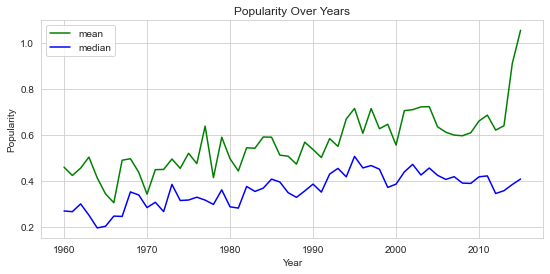

In [35]:
#set style
sns.set_style('whitegrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, p_mean
x2, y2 = index_median, p_median
#set size
plt.figure(figsize=(9, 4))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'g', label = 'mean')
plt.plot(x2, y2, color = 'b', label = 'median')
#set title and labels
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity');
#set legend
plt.legend(loc='upper left')

From the figure above, we can see that the trend of popularity mean is upward year to year, and the peak is in the 2015, while the trend of popularity median is slightly smoother in recent years. We still can conclude that on average, popularity over years is going up in recent years. The trend is reasonable due to the eaiser access of movie information nowadays. Moreover, in the Internet age, people can easily search and gether movie information, even watch the content through different sources. Maybe it is such the backgroud that boost the movie popularity metrics.

### Question 2: What features are associated with movies that have high popularity?

Let me start with the sub-questions that will help me in answering the question...

#### 2.1 What's the budget level movie are associated with movies that have high popularity?
#### 2.2 What's the runtime level are associated with movies that have high popularity on average?

To simply answer the above two questions, I need to define a function which will help me in dividing the __budget__ and __runtime__ data into four levels with it's quartile: *'Low', 'Medium', 'Moderately High', 'High'* and create a level column to store them. This is because, both the __budget__ and __runtime__ data are quantitative.

Then I proceed to do that in the next __code cell__

In [36]:
# creating my function of quartile
def cut_into_quantile(dfname, column_name):
    
# finding my quartiles, maximum and minimum values
    min_value = dfname[column_name].min()                  #The minimum value from the column
    first_quantile = dfname[column_name].describe()[4]     #The 1st quantile of the column
    second_quantile = dfname[column_name].describe()[5]    #The 2nd quantile of the column
    third_quantile = dfname[column_name].describe()[6]     #The 3rd quantile of the column
    max_value = dfname[column_name].max()                  #The maximum value from the column
    
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
    
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
    
# Creating budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

**Now let me answer the first sub-question, the association of budget with successfull movies.** 

In [37]:
# I am using the cut_into_quantile function created above to build a level column
df = cut_into_quantile(df,'budget')

# Viewing the data
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels
0,135397,32.985763,150000000.0,150000000.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High


In [38]:
# Finding the mean popularity of each level with groupby
result_mean = df.groupby('budget_levels')['popularity'].mean()
result_mean 

budget_levels
Low                0.510678
Medium             0.726490
Moderately High    0.988660
High               1.821742
Name: popularity, dtype: float64

In [39]:
# Finding the median popularity of each level with groupby
result_median = df.groupby('budget_levels')['popularity'].median()
result_median

budget_levels
Low                0.367621
Medium             0.507987
Moderately High    0.733975
High               1.232098
Name: popularity, dtype: float64

Now, I will visualize it...

In [40]:
# the x locations for the groups
ind = np.arange(len(result_mean))  

# the width of the bars
width = 0.5       
ind

array([0, 1, 2, 3])

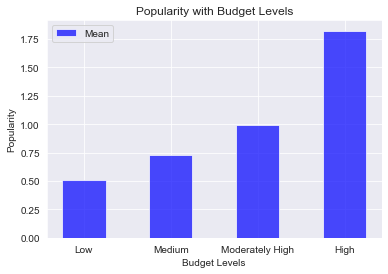

In [41]:
# ploting bars

#setting style
sns.set_style('darkgrid')
bars = plt.bar(ind, result_mean, width, color='b', alpha=.7, label='Mean')

# title and labels
plt.ylabel('Popularity')
plt.xlabel('Budget Levels')
plt.title('Popularity with Budget Levels')

locations = ind  # xtick locations
labels = result_median.index  
plt.xticks(locations, labels)

# legend
plt.legend() 

**From the plot above, we can see that movies with higher popularity are with higher budget level.** The result is reasonable since movies with higher popularity may has a higher promoting advertising cost. And with the high promotion level people always have more probability to get know these movies.

### Exploring Continues...

**Now let me answer the second sub-question, the association of runtime with successfull movies.**

In [42]:
# I am using the cut_into_quantile function created above to build a level column
df = cut_into_quantile(df,'runtime')

# Viewing the data
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels
0,135397,32.985763,150000000.0,150000000.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High,High


In [43]:
# Finding the mean popularity of each level with groupby
result_mean = df.groupby('runtime_levels')['popularity'].mean()
result_mean 

runtime_levels
Low                0.418723
Medium             0.551560
Moderately High    0.656342
High               1.019749
Name: popularity, dtype: float64

In [44]:
# Finding the median popularity of each level with groupby
result_median = df.groupby('runtime_levels')['popularity'].median()
result_median

runtime_levels
Low                0.290399
Medium             0.366125
Moderately High    0.420568
High               0.529933
Name: popularity, dtype: float64

Now, I will visualize it...

In [45]:
# the x locations for the groups
ind = np.arange(len(result_mean))  

# the width of the bars
width = 0.5       
ind

array([0, 1, 2, 3])

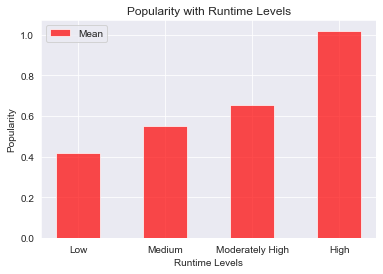

In [46]:
# ploting bars

#setting style
sns.set_style('darkgrid')
bars = plt.bar(ind, result_mean, width, color='r', alpha=.7, label='Mean')

# title and labels
plt.ylabel('Popularity')
plt.xlabel('Runtime Levels')
plt.title('Popularity with Runtime Levels')

locations = ind  # xtick locations
labels = result_median.index  
plt.xticks(locations, labels)

# legend
plt.legend() 

#### Conclusively, the highest runtime movies are the most populous 

### Question 3: What features are associated with movies that have high voting score?

Just like I explore the question 2 above, the same goes for question 3: With the help of the function of cutting quantile I crerated.

Recall, the the dataframe already have the new columns (dividing the quantiles). So no need to pass the function again

**Now let me answer the first sub-question, the association of budget with successfull movies.** High votes score shows a movie is successfull

In [47]:
# Finding the mean popularity of each level with groupby
result_mean = df.groupby('budget_levels')['vote_average'].mean()
result_mean 

budget_levels
Low                5.947569
Medium             6.016922
Moderately High    6.066133
High               6.104504
Name: vote_average, dtype: float64

In [48]:
# Finding the median popularity of each level with groupby
result_median = df.groupby('budget_levels')['vote_average'].median()
result_median

budget_levels
Low                6.0
Medium             6.1
Moderately High    6.1
High               6.1
Name: vote_average, dtype: float64

Now, I will visualize it...

In [49]:
# the x locations for the groups
ind = np.arange(len(result_mean))  

# the width of the bars
width = 0.5       
ind

array([0, 1, 2, 3])

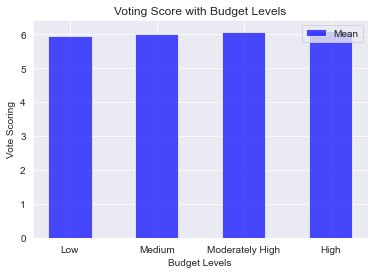

In [50]:
# ploting bars

#setting style
sns.set_style('darkgrid')
bars = plt.bar(ind, result_mean, width, color='b', alpha=.7, label='Mean')

# title and labels
plt.ylabel('Vote Scoring')
plt.xlabel('Budget Levels')
plt.title('Voting Score with Budget Levels')

locations = ind  # xtick locations
labels = result_median.index  
plt.xticks(locations, labels)

# legend
plt.legend() 

**We can see that there is no big difference in average voting score at different budget levels.** So from the result, maybe high budget of a movie is not necessary to a good quality of movie!

### Exploring Continues...

**Now let me answer the second sub-question, the association of runtime with successfull movies.** High votes score shows a movie is successfull

In [51]:
# Finding the mean popularity of each level with groupby
result_mean = df.groupby('runtime_levels')['vote_average'].mean()
result_mean 

runtime_levels
Low                5.726425
Medium             5.724355
Moderately High    6.044946
High               6.401297
Name: vote_average, dtype: float64

In [52]:
# Finding the median popularity of each level with groupby
result_median = df.groupby('runtime_levels')['vote_average'].median()
result_median

runtime_levels
Low                5.8
Medium             5.8
Moderately High    6.1
High               6.4
Name: vote_average, dtype: float64

Now, I will visualize it...

In [53]:
# the x locations for the groups
ind = np.arange(len(result_mean))  

# the width of the bars
width = 0.5       
ind

array([0, 1, 2, 3])

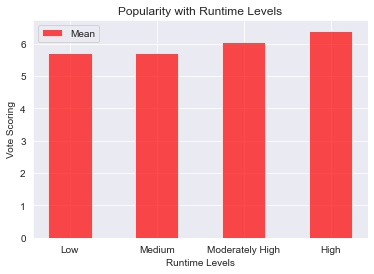

In [54]:
# ploting bars

#setting style
sns.set_style('darkgrid')
bars = plt.bar(ind, result_mean, width, color='r', alpha=.7, label='Mean')

# title and labels
plt.ylabel('Vote Scoring')
plt.xlabel('Runtime Levels')
plt.title('Popularity with Runtime Levels')

locations = ind  # xtick locations
labels = result_median.index  
plt.xticks(locations, labels)

# legend
plt.legend() 

**We can see that there is no huge difference in average voting score in different runtime levels.** So from the result, maybe long runtime of a movie is not necessary to a good quality of movie!

### Question 4: How is casts, directors, keywords, genres and production companies affect the movies that have high popularity?

> **Building a split string function.** This will help me in spliting the columns with multiple values in a row seperated by **|**

In [55]:
# split pipe characters and count their number of appeared times
#argument:dataframe_col is the target dataframe&column; num is the number of the top factor
def find_top(dataframe_col, num=3):
    
    # split the characters in the input column 
    #and make it to a list
    alist = dataframe_col.str.cat(sep='|').split('|')
    
    #transfer it to a dataframe
    new = pd.DataFrame({'top' :alist})
    
    #count their number of appeared times and
    #choose the top3
    top = new['top'].value_counts().head(num)
    return top

> **Sample prepare-- Filter Top 50 and Worst 50 movies in each year as the research sample.**

#### Selecting Top 50 popular movies in every year.


In [56]:
# Select Top 50 popular movies.
# fisrt sort it by release year ascending and popularity descending
df_top_p = df.sort_values(['release_year','popularity'], ascending=[True, False])

#group by year and choose the top 50 high
df_top_p = df_top_p.groupby('release_year').head(50).reset_index(drop=True)

#checking to confirm
df_top_p.head()


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels
0,539,2.610362,806948.0,806948.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,Low,Moderately High
1,966,1.872132,2000000.0,2000000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960,Low,High
2,967,1.136943,12000000.0,12000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960,Medium,High
3,284,0.947307,3000000.0,3000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960,Low,High
4,24014,0.875173,NaN,NaN,Let's Make Love,Marilyn Monroe|Yves Montand|Tony Randall|Frank...,George Cukor,musical,114,Comedy|Romance,Twentieth Century Fox Film Corporation|The Com...,10/7/60,15,4.9,1960,NaN,High


#### Selecting Top 50 high revenue movies in every year.

In [57]:
# Select Top 50 high revenue movies.
# fisrt sort it by release year ascending and revenue descending
df_top_r = df.sort_values(['release_year','revenue'], ascending=[True, False])

#group by year and choose the top 50 high
df_top_r = df_top_r.groupby('release_year').head(50).reset_index(drop=True)

#checking to confirm
df_top_r.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels
0,967,1.136943,12000000.0,12000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960,Medium,High
1,284,0.947307,3000000.0,3000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960,Low,High
2,18973,0.055821,3000000.0,3000000.0,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,NaN,91,Comedy|Romance,Paramount Pictures|Jerry Lewis Productions,12/18/60,13,7.2,1960,Low,Medium
3,966,1.872132,2000000.0,2000000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960,Low,High
4,539,2.610362,806948.0,806948.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,Low,Moderately High


#### Selecting Top 50 high score rating movies in every year.

In [58]:
# Select Top 50 high scorer rating movies.
# fisrt sort it by release year ascending and high scorer ating descending
df_top_s = df.sort_values(['release_year','vote_average'], ascending=[True, False])

#group by year and choose the top 50 high
df_top_s = df_top_s.groupby('release_year').head(50).reset_index(drop=True)

#checking to confirm
df_top_s.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels
0,539,2.610362,806948.0,806948.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,Low,Moderately High
1,284,0.947307,3000000.0,3000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960,Low,High
2,11167,0.569424,NaN,NaN,Peeping Tom,Karlheinz BÃ¶hm|Moira Shearer|Anna Massey|Maxi...,Michael Powell,cinematographer|photography|illegal prostitution,101,Horror|Thriller,National Film Finance Corporation (NFFC)|Anglo...,4/6/60,56,7.4,1960,NaN,Moderately High
3,2134,0.712389,750000.0,750000.0,The Time Machine,Rod Taylor|Alan Young|Yvette Mimieux|Sebastian...,George Pal,london|inventor|future|time travel|dystopia,103,Thriller|Adventure|Fantasy|Science Fiction|Rom...,George Pal Productions|Galaxy Films Inc.,8/17/60,101,7.3,1960,Low,Moderately High
4,31102,0.254124,NaN,NaN,Pollyanna,Hayley Mills|Jane Wyman|Richard Egan|Karl Mald...,David Swift,friends|girl|tween girl,134,Drama|Family,Walt Disney Productions,5/19/60,25,7.2,1960,NaN,High


### To compare results, I also create three subdataset for the last 50 movies.

In [59]:
# the last 50 popular movies in every year
df_low_p = df.sort_values(['release_year','popularity'], ascending=[True, True])
df_low_p = df_low_p.groupby('release_year').head(50).reset_index(drop=True)

# the last 50 high revenue movies in every year
df_low_r = df.sort_values(['release_year','revenue'], ascending=[True, True])
df_low_r = df_low_r.groupby('release_year').head(50).reset_index(drop=True)

# the last 50 score rating movies in every year
df_low_s = df.sort_values(['release_year','vote_average'], ascending=[True, True])
df_low_s = df_low_s.groupby('release_year').head(50).reset_index(drop=True)

> How is casts, directors, keywords, genres and production companies affect the movies that have high popularity?

**First, I am finding the three highest occurrences in each category among the top 50 popular movies. And store the result table into variables in order to create a summary table later**

In [60]:
# find top three cast
t3_cast = find_top(df_top_p.cast)

# find top three director
t3_director = find_top(df_top_p.director)

# find top three keywords
t3_keywords = find_top(df_top_p.keywords)

# find top three genres
t3_genres = find_top(df_top_p.genres)

# find top three production companies
t3_p_com = find_top(df_top_p.production_companies)

**Now I will use the result above to create a summary table.**

In [62]:
#Creating a summary dataframe.
df_popular = pd.DataFrame({'popular_cast': t3_cast.index, 'popular_director': t3_director.index, 'popular_keywords': t3_keywords.index, 'popular_genres': t3_genres.index, 'popular_producer': t3_p_com.index})
df_popular

,popular_cast,popular_director,popular_keywords,popular_genres,popular_producer
0,Clint Eastwood,Steven Spielberg,based on novel,Drama,Warner Bros.
1,Robert De Niro,Martin Scorsese,dystopia,Comedy,Universal Pictures
2,Michael Caine,Clint Eastwood,new york,Action,Paramount Pictures


**Now, let me find the three highest occurrences in each category among the 50 unpopular movies.**

In [63]:
# find top three cast among the among the 50 unpopular movies
tt3_cast = find_top(df_low_p.cast)

# find top three director among the among the 50 unpopular movies
tt3_director = find_top(df_low_p.director)

# find top three keywords among the among the 50 unpopular movies
tt3_keywords = find_top(df_low_p.keywords)

# find top three genres among the among the 50 unpopular movies
tt3_genres = find_top(df_low_p.genres)

# find top three production companiess among the among the 50 unpopular movies
tt3_p_com = find_top(df_low_p.production_companies)

In [64]:
df_unpopular = pd.DataFrame({'unpopular_cast': tt3_cast.index, 'unpopular_director': tt3_director.index, 'unpopular_keywords': tt3_keywords.index, 'unpopular_genres': tt3_genres.index, 'unpopular_producer': tt3_p_com.index})
df_unpopular

,unpopular_cast,unpopular_director,unpopular_keywords,unpopular_genres,unpopular_producer
0,Clint Eastwood,Sidney Lumet,independent film,Drama,Universal Pictures
1,Christopher Lee,Woody Allen,woman director,Comedy,Paramount Pictures
2,John Wayne,Norman Jewison,based on novel,Thriller,Warner Bros.


**Now, we get the two table that list the properties occurred the most among the top 50 popular movies each year, among the top 50 unpopular movies each year respectively.**

**Now we can campare the two tables and find out What's casts, directors, keywords, genres and production companies are associated with high popularity.**

From the tables above, we can find that cast *Clint Eastwood* has appeared in both popular and unpopular movies; genres Drama and Comedy has appeared in both popular and unpopular movies; all three producer Universal Pictures, Warner Bros, Paramount Pictures have appeared in both popular and unpopular movies. The summary are as follows:

+ Cast associated with high popularity movies: *Robert De Niro*  and *Michael Caine*.
+ Director associated with high popularity movies: *Steven Spielberg*, *Martin Scorsese* and *Clint Eastwood*.
+ Both of the most popular and unpopular movies are associated three mainly genres: Drama, Comedy, and Thriller. I just can infer that these genres are common in the movie industry.
+ Keywords associated with high popularity movies: *based on novel*, *new york* and *dystopia*.
+ Producer associated with high popularity movies and unpopularity movies: *Warner Bros*, *Universal Pictures* and *Paramount Pictures*.

<a id='conclusions'></a>
### Conclusion

+ First, I explored a general question. Which shows that the movie popularity trend is growing from 1960 on average.
+ I also found out the properties that are associated with high popularity movies. They were with high budget levels and longer run time.
+ And cast associated with high popularity movies are *Robert De Niro*  and *Michael Caine*; director associated with high popularity movies are *Steven Spielberg*, *Martin Scorsese* and *Clint Eastwood*; genres associated with high popularity movies are drama, comedy, and thriller; keywords associated with high popularity movies are *based on novel*, *new york* and *dystopia*; producer associated with high popularity movies are *Warner Bros*, *Universal Pictures* and *Paramount Pictures*.

### Limitation

1. **Data quality:** althought I assume the zero values in revenue and budget column are missing, there are still a lot of unreasonable value in the both of the columns. Also, the metrics about rating or popularity are not defined clearly, and the basis of them may be changing year by year.
2. **Units of revenue and budget column:** I am not sure that the budgets and revenues all in US dollars or Nigerian Naira?
3. **The inflation effect:** I used the revenue and budget data to explore, but I didn't use the adjusted data, although it is provided the adjusted data based on the year 2010
4. I dicussed the properties are associated with successful movies. The successful I defined here are high popularity only even though I know high voting score too might define a successful movie. I just assume the high popularity level are with higher voting score, this is because the populous (popularity) are the one voting, so it makes me just leave out the finding the properties of high voting score. But I think there might be some other factors that are associated with high voting score movies.
5. I dicussed the **budget level and runtime level** properties, but I just cut both of them based on the whole time quantile data not year by year.